## Data 
Inflation Data from INEGI and Banco de Mexico

The data gathered is from jan 1969 until sept 2020 on a monthly basis

In [1]:
import pandas as pd

In [2]:
inpcseries=pd.read_excel('INPC_series_092020.xlsx',header=17)

In [3]:
inpcseries=inpcseries[['Fecha','SP1']]

In [4]:
inpcseries.dropna(inplace=True)

In [5]:
#inital plot of data

In [6]:
import matplotlib.pyplot as plt

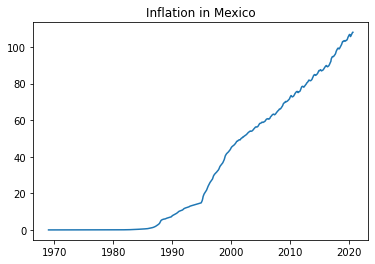

In [7]:
plt.plot(inpcseries['Fecha'],inpcseries['SP1'])
plt.title('Inflation in Mexico')
plt.savefig('Inflation_Mex.png')


As we can see here, inflation has a trend to increase over time, the slope has variations and the increase becomes more drastical

In [8]:
#get pacf and acf 
!pip install statsmodels
import statsmodels.api as sm


     |████████████████████████████████| 9.5MB 1.3MB/s  eta 0:00:01     |███████████████▍                | 4.6MB 12.9MB/s eta 0:00:01     |█████████████████████████████   | 8.6MB 12.9MB/s eta 0:00:01
     |████████████████████████████████| 235kB 6.6MB/s eta 0:00:01


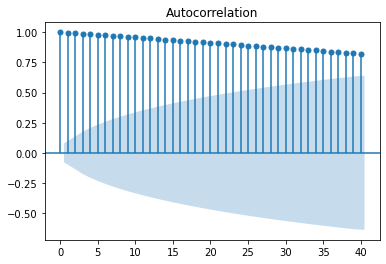

In [9]:
fig1 = sm.graphics.tsa.plot_acf(inpcseries['SP1'], lags=40)


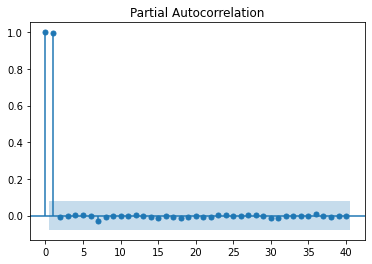

In [10]:
fig2 = sm.graphics.tsa.plot_pacf(inpcseries['SP1'], lags=40)


#### Is DATA Stationary?


In [11]:
!pip install arch
from arch.unitroot import KPSS
kpss_test = KPSS(inpcseries['SP1'])

# Test summary 
print(kpss_test.summary().as_text())


     |████████████████████████████████| 798kB 3.7MB/s eta 0:00:01
     |████████████████████████████████| 2.0MB 23.2MB/s eta 0:00:01
    KPSS Stationarity Test Results   
Test Statistic                  3.545
P-value                         0.000
Lags                               16
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.


We can safely say that p<0.05 thus data is stationary and no differentiation needs to be done


# Methodology 

We will use different machine learning approaches to attempt to predict inflation variation in Mexico

In [12]:
import datetime
import numpy as np

In [13]:
#X=inpcseries['Fecha']
#X=pd.to_datetime(X, '%d/%m/%Y').dt.strftime('%Y%m%d').astype(float)#convert timestamp to float to correctly analyze data
#y=inpcseries['SP1']
#df=inpcseries.loc[:, inpcseries.columns != 'Fecha']
#X=X[: ,np.newaxis]
#X = X[:, np.newaxis] =X.values.reshape(-1,1)
#df = pd.DataFrame({'temp':np.random.rand(500)})
#def create_lags(df, N):
#    for i in range(N):
#        df['Lag' + str(i+1)] = df['SP1'].shift(i+1)
#    return df
#df = create_lags(df,10)
#df = df.dropna()
# create X and y
#y = df['SP1'].values
#X = df.iloc[:, 1:].values

# Train on 70% of the data
#train_idx = int(len(df) * .8)

# create train and test data
#X_train, y_train, X_test, y_test = X[:train_idx], y[:train_idx], X[train_idx:], y[:train_idx]
#regr=linear_model.LinearRegression(fit_intercept=True)
#regr.fit(X_train,y_train)
#linpred=regr.predict(X_test)

#print('Mean Squared Error:',mean_squared_error(y_test[-len(linpred):],linpred))

# fit and predict
#clf = SVR()
#clf.fit(X_train, y_train)
#clf.predict(X_test)


In [14]:
X=inpcseries['Fecha']
X=pd.to_datetime(X, '%d/%m/%Y').dt.strftime('%Y%m%d').astype(float)#convert timestamp to float to correctly analyze data
y=inpcseries['SP1']
y=y.values
#X = X[:, np.newaxis] =X.values.reshape(-1,1)
y=y[:,np.newaxis]
X = X[:, np.newaxis] 


from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit()
#for train_index, test_index in tscv.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
 #   X_train, X_test = X[train_index], X[test_index]
  #  y_train, y_test = y[train_index], y[test_index]


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)
#X_train=X[:int(len(X)*0.8)]
#X_test=(X[int(len(X)*0.8):])
#y_train=y[:int(len(X)*0.8)]
#y_test=y[int(len(X)*0.8):]

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  import sys
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/model_selection/_split.py:778: FutureWarning: You should specify a value for 'n_splits' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(NSPLIT_WARNING, FutureWarning)


#### Linear model

In [15]:
from sklearn import linear_model
#regr = linear_model.LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
regr=linear_model.LinearRegression(fit_intercept=True)


In [16]:
regr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [17]:
linpred=regr.predict(X_test)


In [18]:
accuracy_linear=regr.score(y_test.reshape(-1,1),linpred)


In [19]:
print('The accuracy of prediction obtained with the linear regression is',accuracy_linear)
print('Mean Squared Error:',mean_squared_error(y_test,linpred))


The accuracy of prediction obtained with the linear regression is -15923.503979869312
Mean Squared Error: 127.0901565618128


In [20]:
import math
math.sqrt(127.09015)

11.273426719502815

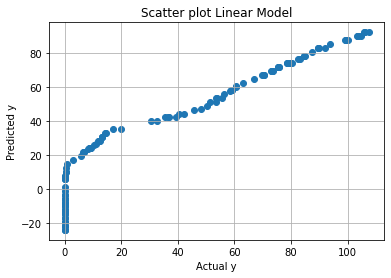

In [21]:
#plot the comparison
plt.scatter(y_test,linpred)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Scatter plot Linear Model')
plt.show() 


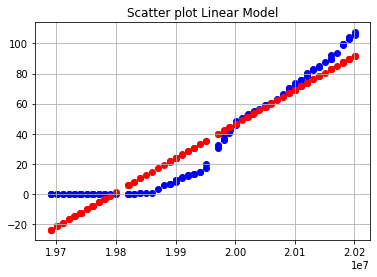

In [22]:

#plot the comparison
fig1=plt.figure()
ax1 = fig1.add_subplot(111)
ax1.scatter(X_test,y_test, c='b', label='test data')
ax1.scatter(X_test,linpred,  c='r', marker="o", label='predicted data')
plt.grid()
plt.title('Scatter plot Linear Model')
plt.show()
fig1.savefig('Linear_Regression1.png')

As we can see the linear Regression is a good approach but it can be better

##### SGD Regression

In [25]:
X=inpcseries['Fecha']
X=pd.to_datetime(X, '%d/%m/%Y').dt.strftime('%Y%m%d').astype(float)#convert timestamp to float to correctly analyze data
y=inpcseries['SP1']
y=y.values
#X = X[:, np.newaxis] =X.values.reshape(-1,1)
#y=y[:,np.newaxis]
X = X[:, np.newaxis] 


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,)


from sklearn import preprocessing
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

#scaler = StandardScaler() #default iter is 1000, 
# Always scale the input. The most convenient way is to use a pipeline.

# standardizing data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_train=X_train.reshape(-1,1)
X_test=scaler.transform(X_test)
X_test=X_test.reshape(-1,1)

#X_test=np.array(X_test)
#y_test=np.array(y_test)



#clfsgd = make_pipeline(StandardScaler(),SGDRegressor())
clfsgd=SGDRegressor()
clfsgd.fit(X_train,y_train)
sksgd_pred=clfsgd.predict(X_test)
#plt.scatter(y_test,y_pred_sksgd)

#clf.fit(X=X_train, y=[y for _,y in training])

#print(clf.intercept_, clf.coef_)

#print('Testing...')
#for X,y in testing:
#    p = clf.predict(scaler.transform([X]))
#    print(X[0],y,p[0],abs(p[0]-y))
gdscore=clfsgd.score(y_test.reshape(-1,1),sksgd_pred)


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  import sys
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [26]:
print('The accuracy of prediction obtained with the linear regression is',gdscore)
print('Mean Squared Error:',mean_squared_error(y_test,sksgd_pred))


The accuracy of prediction obtained with the linear regression is -2348.095163595274
Mean Squared Error: 115.17055137468869


In [28]:
math.sqrt(115.17)

10.731728658515365

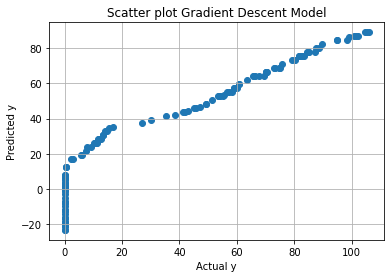

In [26]:
#plot the comparison
plt.scatter(y_test,sksgd_pred)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Scatter plot Gradient Descent Model')
plt.show()


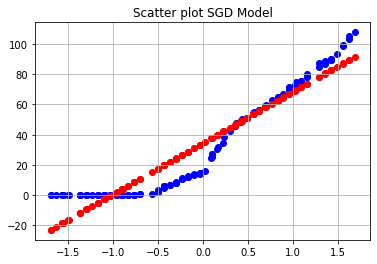

In [29]:

fig2=plt.figure()
ax1 = fig2.add_subplot(111)
ax1.scatter(X_test,y_test, c='b', label='test data')
ax1.scatter(X_test,sksgd_pred,  c='r', marker="o", label='predicted data')
plt.grid()
plt.title('Scatter plot SGD Model')
plt.show()
fig2.savefig('SGD.png')

As we can see here SGD doesn't perform as well because it is well suited for data >=10,000 values according to documentation, 
In this case we can see that SGD performs quite similar to Linear Regression

#### Support Vector Machine

In [39]:
from sklearn import svm
X=inpcseries['Fecha']
X=pd.to_datetime(X, '%d/%m/%Y').dt.strftime('%Y%m%d').astype(float)#convert timestamp to float to correctly analyze data
y=inpcseries['SP1']
y=y[:,np.newaxis]
X = X[:, np.newaxis] 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


In [40]:
#Compare linear ,poly and rbf kernels
svm_linear = svm.SVR(kernel='linear',C=1,gamma='scale')
svm_linear.fit(X_train,y_train)
svm_pred=svm_linear.predict(X_test)


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#poly kernel
svm_poly = svm.SVR(kernel='poly',C=1,degree=3,gamma='scale')
svm_poly.fit(X_train,y_train)
svm_pred1=svm_poly.predict(X_test)


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [37]:
#rbf kernel
svm_rbf=svm.SVR(kernel='rbf',C=100,gamma='scale')
svm_rbf.fit(X_train,y_train)
svm_pred2=svm_rbf.predict(X_test)


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [38]:

f1_linear=svm_linear.score(y_test,svm_pred)
try:
    f1_poly=svm_poly.score(y_test,svm_pred1)
except:
    f1_poly=-100000000000
f1_rbf=svm_rbf.score(y_test,svm_pred2)

print ('For the Linear kernel the score is {}'.format(f1_linear))
print ('The SVM with poly kernel the score is {}'.format(f1_poly))
print ('The SVM with RBF kernel the score is {}'.format(f1_rbf))

print('The highest score is {}'.format(max(f1_linear,f1_rbf,f1_poly)))

print ('For the Linear kernel the RMSE is {}'.format(mean_squared_error(y_test,svm_pred)))
#print ('The SVM with poly kernel the RMSE is {}'.format(mean_squared_error(y_test,svm_pred1)))
print ('The SVM with RBF kernel the RMSE is {}'.format((mean_squared_error(y_test,svm_pred2))))


For the Linear kernel the score is -16925.011576009012
The SVM with poly kernel the score is -100000000000
The SVM with RBF kernel the score is -0.004156514397817279
The highest score is -0.004156514397817279
For the Linear kernel the RMSE is 616165412294666.9
The SVM with RBF kernel the RMSE is 7.972126165445915


The model that performs thebest is the rbf kernel since the data is not specifically linear, it fits better,
So this is the one we will plot

In [ ]:
#plot the comparison
plt.scatter(y_test,svm_pred2)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Scatter plot SVM Linear Model')
plt.show()


In [ ]:
fig3=plt.figure()
ax3 = fig3.add_subplot(111)
ax3.scatter(X_test,y_test, c='b', label='test data')
ax3.scatter(X_test,svm_pred2,  c='r', marker="o", label='predicted data SVM')
plt.grid()
plt.title('SVM Model')
plt.show()


This is quite nice so we will declare a winner!! The SVM Regressor with the rbf kernel-

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostRegressor(base_estimator=None, learning_rate=0.05, loss='linear',
         n_estimators=1000, random_state=None)

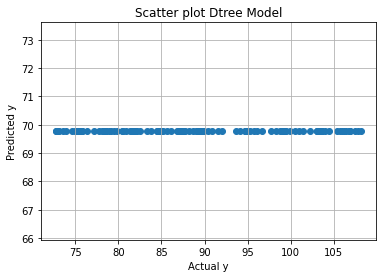

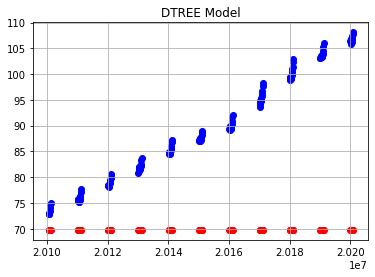